# Supplement Sales Prediction
Your Client WOMart is a leading nutrition and supplement retail chain that offers a comprehensive range of products for all your wellness and fitness needs. 

WOMart follows a multi-channel distribution strategy with 350+ retail stores spread across 100+ cities. 

#### Effective forecasting for store sales gives essential insight into upcoming cash flow, meaning WOMart can more accurately plan the cashflow at the store level.

Sales data for 18 months from 365 stores of WOMart is available along with information on Store Type, Location Type for each store, Region Code for every store, Discount provided by the store on every day, Number of Orders everyday etc.

Your task is to predict the store sales for each store in the test set for the next two months.

#### Data Dictionary
## Train Data
###### Variable

###### Definition
- ID
- Unique Identifier for a row
- Store_id
- Unique id for each Store
- Store_Type
- Type of the Store
- Location_Type
- Type of the location where Store is located
- Region_Code
- Code of the Region where Store is located
- Date
- Information about the Date
- Holiday
- If there is holiday on the given Date, 1 : Yes, 0 : No
- Discount
- If discount is offered by store on the given Date, Yes/ No
- #Orders
- Number of Orders received by the Store on the given Day
- Sales
- Total Sale for the Store on the given Day


In [1]:
# important library
import pandas as ps
import numpy as ny
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Train DATA
train_set = ps.read_csv('TRAIN.csv')
train_set.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [3]:
#Test Data
test_set = ps.read_csv('TEST_FINAL.csv')
test_set.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [4]:
# Sample Data Submission Data
sample = ps.read_csv('SAMPLE.csv')
sample.head()

,ID,Sales
0,T1188341,42275
1,T1188342,42275
2,T1188343,42275
3,T1188344,42275
4,T1188345,42275


# 1. Primary checks and data cleaning

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [6]:
test_set.info() # Data types also match.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [7]:
# Checking for null, missing and cleaning if needed.

train_set.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [8]:
test_set.isnull().sum() # No nulls !

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [9]:
train_set.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [10]:
test_set.describe()

,Store_id,Holiday
count,22265.000000,22265.000000
mean,183.000000,0.032787
std,105.368395,0.178082
min,1.000000,0.000000
25%,92.000000,0.000000
50%,183.000000,0.000000
75%,274.000000,0.000000
max,365.000000,1.000000


# 2. Data pre-processing and Feature Engineering

In [11]:
# Converting dates to datatime
train_set['Date'] = ps.to_datetime(train_set['Date'])
test_set['Date'] = ps.to_datetime(test_set['Date'])


test_set.info() #head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             22265 non-null  object        
 1   Store_id       22265 non-null  int64         
 2   Store_Type     22265 non-null  object        
 3   Location_Type  22265 non-null  object        
 4   Region_Code    22265 non-null  object        
 5   Date           22265 non-null  datetime64[ns]
 6   Holiday        22265 non-null  int64         
 7   Discount       22265 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 1.4+ MB


In [12]:
# Dropping unusable columns
X = train_set.drop(columns=['ID','Date','#Order'])
X_test = test_set.drop(columns=['ID','Date'])

X.head(10)


,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,S1,L3,R1,1,Yes,7011.84
1,253,S4,L2,R1,1,Yes,51789.12
2,252,S3,L2,R1,1,Yes,36868.20
3,251,S2,L3,R1,1,Yes,19715.16
4,250,S2,L3,R4,1,Yes,45614.52
5,249,S1,L3,R2,1,Yes,34211.22
6,248,S1,L1,R2,1,Yes,35352.66
7,247,S1,L1,R3,1,Yes,52650.00
8,246,S3,L1,R3,1,Yes,42633.78
9,254,S4,L1,R1,1,Yes,62572.80


<AxesSubplot:>

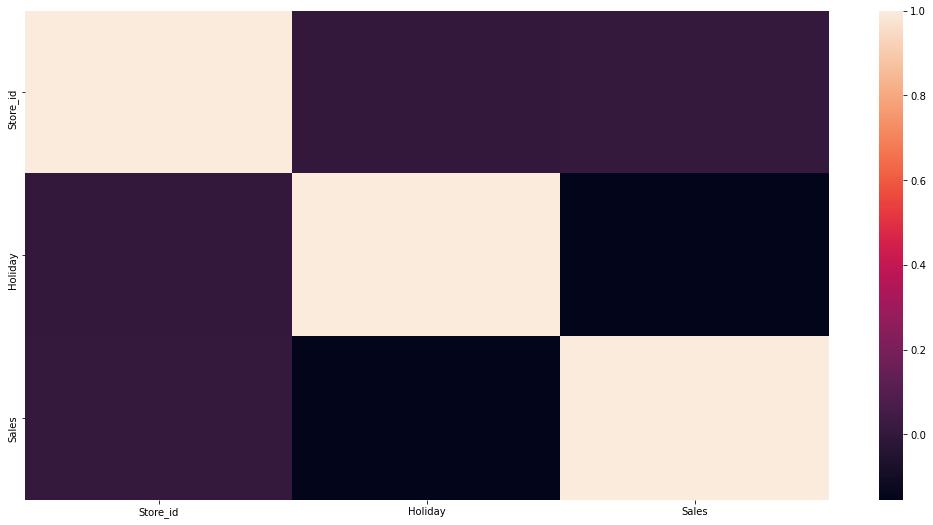

In [13]:
# Corr heatmap
plt.figure(figsize=(18,9))
sns.heatmap(X.corr())

## Visualization Sales with respect to other Factor

<Figure size 1152x432 with 0 Axes>

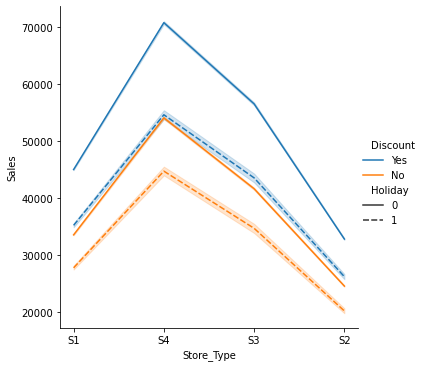

In [14]:
plt.figure(figsize = (16,6))
sns.relplot(x="Store_Type", y="Sales", hue = 'Discount',style= 'Holiday',kind="line",data=train_set)

<Figure size 1152x432 with 0 Axes>

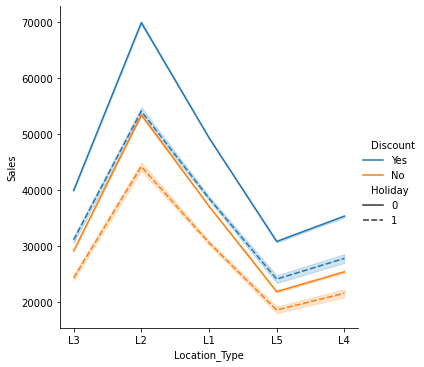

In [15]:
plt.figure(figsize = (16,6))
sns.relplot(x="Location_Type", y="Sales", hue = 'Discount',style= 'Holiday',kind="line",data=train_set)

<Figure size 1152x432 with 0 Axes>

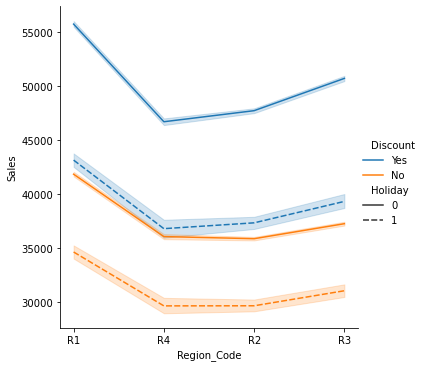

In [16]:
plt.figure(figsize = (16,6))
sns.relplot(x="Region_Code", y="Sales",hue = 'Discount',style= 'Holiday', kind="line",data=train_set)

<Figure size 1152x432 with 0 Axes>

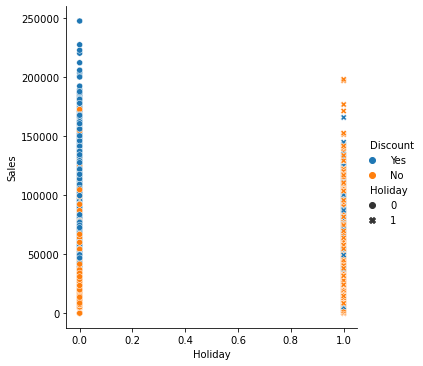

In [17]:
plt.figure(figsize = (16,6))
sns.relplot(x="Holiday", y="Sales",hue = 'Discount',style= 'Holiday' ,data=train_set)

<Figure size 1152x432 with 0 Axes>

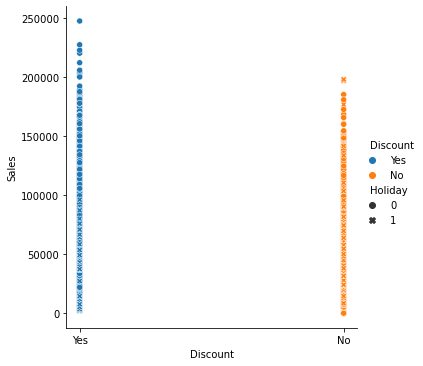

In [18]:
plt.figure(figsize = (16,6))
sns.relplot(x="Discount", y="Sales",hue = 'Discount',style= 'Holiday', data=train_set)

<Figure size 1152x432 with 0 Axes>

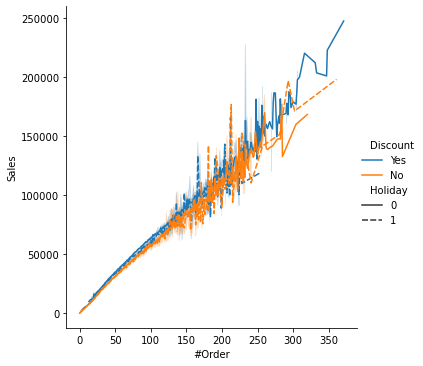

In [19]:
plt.figure(figsize = (16,6))
sns.relplot(x="#Order", y="Sales",hue = 'Discount',style= 'Holiday',kind="line", data=train_set)

<Figure size 1152x432 with 0 Axes>

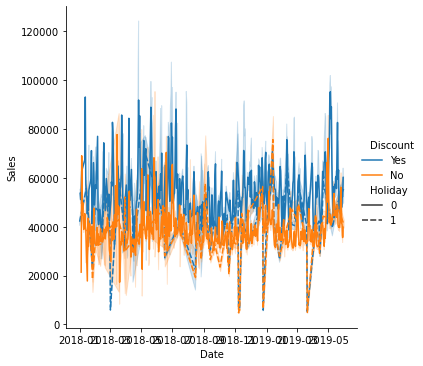

In [20]:
plt.figure(figsize = (16,6))
sns.relplot(x="Date", y="Sales", hue = 'Discount',style= 'Holiday',kind="line",data=train_set)

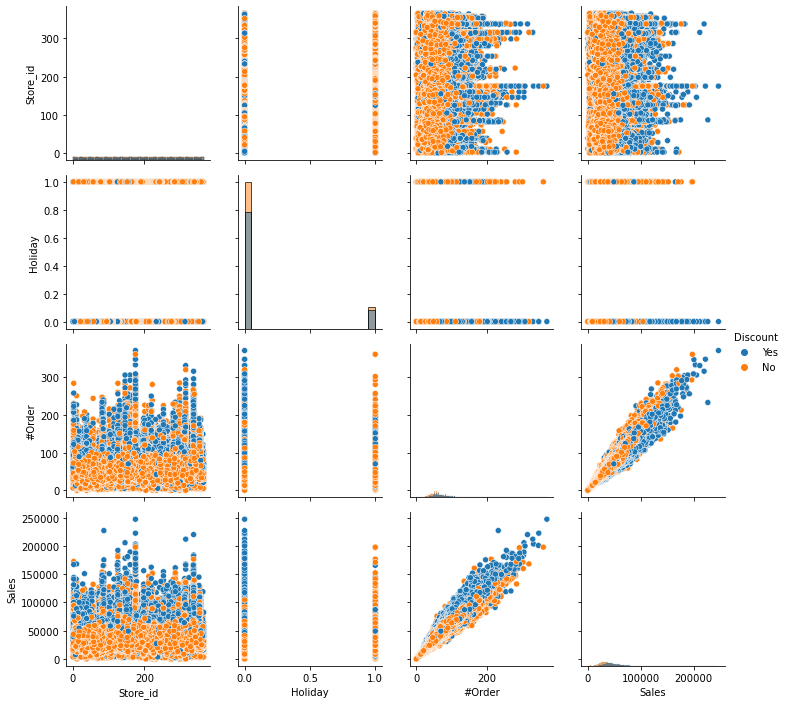

In [21]:
g = sns.PairGrid(train_set, hue="Discount")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

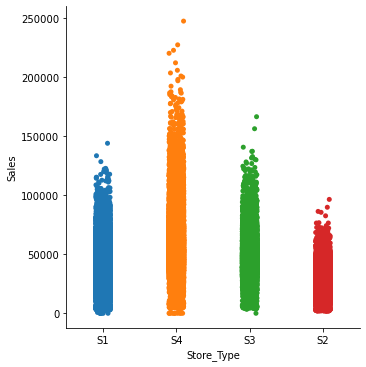

In [22]:
sns.catplot(x="Store_Type", y="Sales", data=train_set)

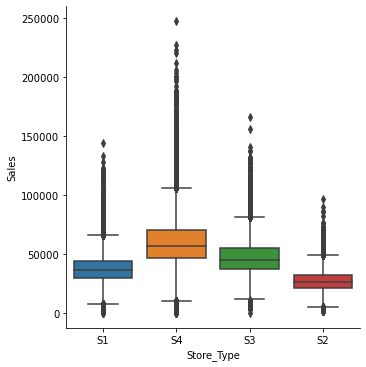

In [24]:
sns.catplot(x="Store_Type", y="Sales", kind="box", data=train_set)

In [25]:

print(" Store types: ", X['Store_Type'].unique())
print(" Location types: ", X['Location_Type'].unique())
print(" Region types: ", X['Region_Code'].unique())


 Store types:  ['S1' 'S4' 'S3' 'S2']
 Location types:  ['L3' 'L2' 'L1' 'L5' 'L4']
 Region types:  ['R1' 'R4' 'R2' 'R3']


In [26]:
# Encoding categoricals.

from sklearn.preprocessing import LabelEncoder 

cat_cols = [e for e in X.columns if X[e].dtype == "object"]

print("Categorical columns are : ",cat_cols,X.columns)


for ec in cat_cols:
    dummy_col = None
    dummy_col = ps.get_dummies(X[ec])
    X = ps.concat([X,dummy_col],axis=1)
    X = X.drop([ec],axis=1)

X.head(10)



Categorical columns are :  ['Store_Type', 'Location_Type', 'Region_Code', 'Discount'] Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', 'Sales'],
      dtype='object')


,Store_id,Holiday,Sales,S1,S2,S3,S4,L1,L2,L3,L4,L5,R1,R2,R3,R4,No,Yes
0,1,1,7011.84,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,253,1,51789.12,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,252,1,36868.20,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,251,1,19715.16,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,250,1,45614.52,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
5,249,1,34211.22,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1
6,248,1,35352.66,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1
7,247,1,52650.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
8,246,1,42633.78,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
9,254,1,62572.80,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1


In [27]:

# Repeating for X_test
cat_cols = [e for e in X_test.columns if X_test[e].dtype == "object"]

for ec in cat_cols:
    dummy_col = None
    dummy_col = ps.get_dummies(X_test[ec])
    X_test = ps.concat([X_test,dummy_col],axis=1)
    X_test = X_test.drop([ec],axis=1)

X_test.head(10)


,Store_id,Holiday,S1,S2,S3,S4,L1,L2,L3,L4,L5,R1,R2,R3,R4,No,Yes
0,171,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
1,172,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,173,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,174,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,170,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
5,175,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
6,176,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
7,169,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0
8,14,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0
9,177,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0


In [28]:
#T-T-S

from sklearn.model_selection import train_test_split


y = X['Sales'] 
X = X.drop(columns=['Sales'])
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size=0.78,random_state=42 ) 

# 3. Data Modelling

# RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [30]:

rf_reg_model = RandomForestRegressor(max_depth=90,max_features='auto',n_estimators=400) #max_depth=15,max_features='auto',n_estimators=80)

rf_reg_model.fit(X_train,y_train)


RandomForestRegressor(max_depth=90, n_estimators=400)

In [31]:
pred1 = rf_reg_model.predict(X_valid) 

In [32]:
rf_r2 = rf_reg_model.score(X_valid,y_valid)
print("R2 Score: ",rf_reg_model.score(X_valid,y_valid))
print('MAE:{}'.format(mean_absolute_error(y_valid,pred1)))
print('MSE:{}'.format(mean_squared_error(y_valid,pred1)))
print('RMSE:{}'.format(ny.sqrt(mean_squared_error(y_valid,pred1))))

R2 Score:  0.6447182061964862
MAE:7644.949139557601
MSE:120140281.05847105
RMSE:10960.852204936944


In [33]:
pred_x_test = rf_reg_model.predict(X_test)

print(pred_x_test)

sample['Sales'] = pred_x_test

[49013.60604122 35892.01541356 70539.76220987 ... 48845.49650721
 31780.81049474 25628.87996745]


In [34]:
sample.to_csv('reg.csv', index=False)

# GradientBoostingRegressor

In [35]:

from sklearn.ensemble import GradientBoostingRegressor

gb_reg_model = GradientBoostingRegressor()

gb_reg_model.fit(X_train,y_train)


GradientBoostingRegressor()

In [36]:

gb_reg_model.score(X_valid,y_valid)

pred2 = gb_reg_model.predict(X_valid) 


In [37]:
gb_r2 = gb_reg_model.score(X_valid,y_valid)
print("R2 Score: ",gb_reg_model.score(X_valid,y_valid))
print('MAE:{}'.format(mean_absolute_error(y_valid,pred2)))
print('MSE:{}'.format(mean_squared_error(y_valid,pred2)))
print('RMSE:{}'.format(ny.sqrt(mean_squared_error(y_valid,pred2))))


R2 Score:  0.5969156913457162
MAE:8189.832283114252
MSE:136304935.90326554
RMSE:11674.97048832525


# XGBRegressor

In [38]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)

xgb_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
xgb_model.score(X_valid,y_valid)

pred3 = xgb_model.predict(X_valid) 

In [40]:
xgb_r2 = xgb_model.score(X_valid,y_valid)
print("R2 Score: ",xgb_model.score(X_valid,y_valid))
print('MAE:{}'.format(mean_absolute_error(y_valid,pred3)))
print('MSE:{}'.format(mean_squared_error(y_valid,pred3)))
print('RMSE:{}'.format(ny.sqrt(mean_squared_error(y_valid,pred3))))

R2 Score:  0.6452454433606125
MAE:7633.888562491515
MSE:119961993.22558075
RMSE:10952.716248747649


In [42]:
pred_x_test = xgb_model.predict(X_test)

print(pred_x_test)

sample['Sales'] = pred_x_test

[50005.746 34879.08  68566.836 ... 48329.39  31905.29  25757.81 ]


In [43]:
sample.head(10)

,ID,Sales
0,T1188341,50005.746094
1,T1188342,34879.078125
2,T1188343,68566.835938
3,T1188344,34209.160156
4,T1188345,36597.332031
5,T1188346,88092.031250
6,T1188347,58486.250000
7,T1188348,44833.347656
8,T1188349,49321.015625
9,T1188350,31893.664062


In [44]:
sample.shape

(22265, 2)

In [45]:
sample.to_csv('xgb_sub.csv', index = False)

<AxesSubplot:>

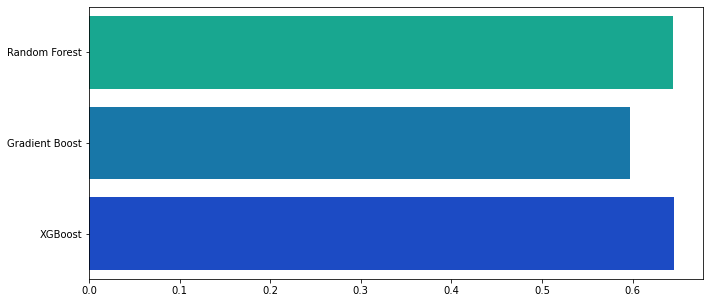

In [47]:
#Scores
scores  = {
    "R2_score" : [rf_r2,gb_r2,xgb_r2],
    "Regressor" : ["Random Forest","Gradient Boost","XGBoost"],
}

plt.figure(figsize=(11,5))
sns.barplot(x=scores["R2_score"],y=scores["Regressor"],palette='winter_r')